# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
# print(boston['DESCR'])   # descripción del dataset
# boston['data']           # matriz con los datos de entrada (atributos)
# boston['target']         # vector de valores a predecir
boston['feature_names']  # nombres de los atributos para cada columna de 'data'

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split

X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

#### Antes de resolver los ejercicios pasaremos la información que tenemos en el diccionario ``boston`` a un data frame de pandas. Además agregaremos la columna ``target``

In [6]:
import pandas as pd

def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

df_boston = sklearn_to_df(boston)
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
# descripción de los features
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

**Responder todas las preguntas acá.**

1- Los datos (Boston house prices dataset-taken from the StatLib library which is maintained at Carnegie Mellon University) se obtuvieron en 1970. La base de datos en estudio reporta el valor de propiedades en Boston, en una escala de 0-50. Además brinda información que estaría vinculada con el valor de dichas propiedades a través de ciertos atributos. La base de datos cuenta con 13 columnas (del tipo numéricos o categóricos), más la variable objetivo que es el valor de la propiedad. Reporta  506 propiedades (filas). Cada fila  de la base de datos nombra un suburbio o una ciudad de Boston.

2- La variable objetivo a predecir es MEDV (Median value of owner-occupied homes in $1000's) y representa una estimación del valor de las propiedades ocupadas por sus dueños (en miles de dólares). Es una cantidad adimensional que va de cero a cincuenta. En nuestro dataset, la variable objetivo es la columna identificada con el nombre "target".

3- Para hacer la predicción se dispone de información de 13 features en total, los cuales listamos a continuación:

   CRIM:     per capita crime rate by town
   ZN:       proportion of residential land zoned for lots over 25,000 sq.ft.
   INDUS:    proportion of non-retail business acres per town
   CHAS:     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   NOX:      nitric oxides concentration (parts per 10 million)
   RM:       average number of rooms per dwelling
   AGE:      proportion of owner-occupied units built prior to 1940
   DIS:      weighted distances to five Boston employment centres
   RAD:      index of accessibility to radial highways
   TAX:      full-value property-tax rate per $10,000
   PTRATIO:  pupil-teacher ratio by town
   B:        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   LSTAT:    % lower status of the population

Presentan información sobre distintos características:

Características  económicas y demográficas de la ciudad, como la tasa del impuesto al valor total de la propiedad por $ 10,000 (TAX),  la tasa de criminalidad per cápita (CRIM), tasa de estudiantes por docente de la ciudad (PTRATIO), porcentaje de la población de menor nivel socio-económico (LSTAT),  y una variable ligada a la proporción de población negra en la ciudad (calculada a partir de la siguiente fórmula: B= 1000(Bk - 0.63)^2 ).

Características de la zona como la proporción de terrenos residenciales divididos en lotes de más de 25,000 pies cuadrados (ZN), proporción de negocios comerciales no minoristas por ciudad (INDUS), el número promedio de habitaciones por vivienda (RM), la proporción de unidades ocupadas por sus dueños que fueron construidas antes de 1940 (AGE).

Características de tipo ambiental y de localización geográfica: la cercanía al río Charles (CHAS), concentración de óxidos nítricos (NOX), la distancia ponderada a 5 centros comerciales de Boston (DIS), índice de accesibilidad a las carreteras radiales (circunvalación) (RAD).

4- A priori, se puede pensar que la ubicación es algo muy importante en la determinación del valor de la propiedad.  Por lo tanto, variables como el índice de accesibilidad (RAD), cercanía al río Charles (CHAS) debido a posibles problemas de inundación, y distancia a los centros comerciales (DIS) podrían tener efecto significativo sobre la MEDV. La cantidad de habitaciones de la propiedad (RM) debería tener un efecto sobre el valor de la propiedad así como también la antiguedad de la misma (AGE).
   
5- Sin conocer las características de la ciudad de Boston, estimamos que hay variables que podrían introducir sesgos y análisis poco éticos de la base dato. La indicación del suburbio por ejemplo si bien es importante podría ser vista como una variable que clasificaría la propiedad en buena-mala. Por otro lado, hay variables más negativas desde el punto de vista ético como el porcentaje de población negra (tomando en cuenta que el data set es de 1970, se supone que hoy día no es políticamente correcto y obviamente no ético incluir (o incluso medir) esa variable/característica.

## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

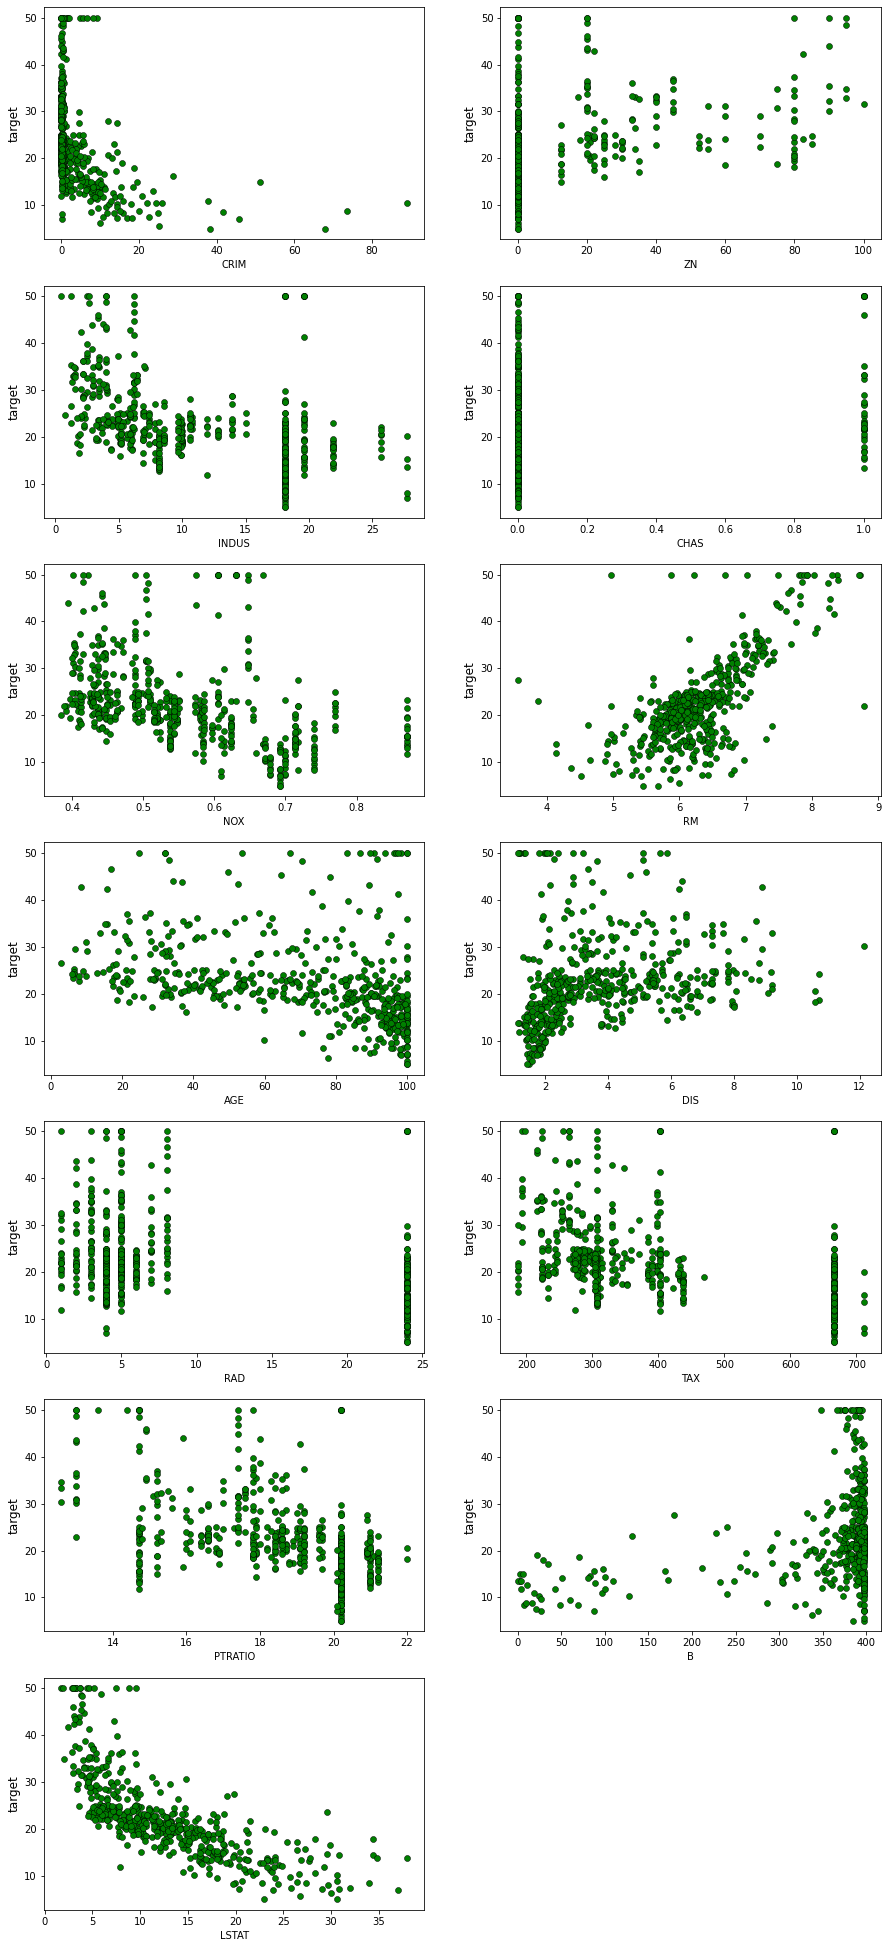

In [8]:
#1. Resolver acá.
import seaborn as sns

fig, axes = plt.subplots(7, 2,figsize=(15,35))
fig.delaxes(ax = axes[6,1])

n_features = len(boston.feature_names)
for name, ax in zip(boston.feature_names,axes.flatten()[:n_features]):
    sns.scatterplot(data=df_boston,x=name, y='target', edgecolor='k',ax=ax, color='green')
    ax.set_ylabel('target',size=12)
plt.show()

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [9]:
# 1. Resolver acá.

# Seleccionamos el porcentaje de la población de menor nivel socio-económico (LSTAT) 
# pues mirando la grafica "target" vs "LSTAT" vemos una alta correlación.

feature = 'LSTAT'  # selecciono el atributo 'LSTAT'
selector = (boston['feature_names'] == feature)

X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]

y_train_reshape = y_train.reshape(-1,1)
y_test_reshape = y_test.reshape(-1,1)

X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [10]:
# 2. Instanciar y entrenar acá.

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False) 
model = make_pipeline(pf, lr)

model.fit(X_train_f, y_train_reshape)
print('Como estados ajustando los datos por una recta, mostramos a continuación el valor\n',
      'de la ordenada al origen y de la pendiente de la misma, de izquierda a derecha (en ese orden).')
print(lr.coef_)

Como estados ajustando los datos por una recta, mostramos a continuación el valor
 de la ordenada al origen y de la pendiente de la misma, de izquierda a derecha (en ese orden).
[[34.76519272 -0.95648761]]


In [11]:
# 3. Predecir y evaluar acá.

from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train_f)
y_test_pred = model.predict(X_test_f)

train_error = mean_squared_error(y_train_reshape, y_train_pred)
test_error = mean_squared_error(y_test_reshape, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Test error: {test_error:f}')

Train error: 36.523966
Test error: 46.336305


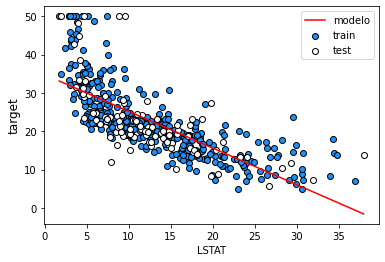

In [12]:
# 4. Graficar acá. Ayuda:

x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)

plt.plot(x, model.predict(x), color="red", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.xlabel(feature)
plt.ylabel('target',size=12)
plt.legend()

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [13]:
# 1. Resolver acá.

train_errors = []
test_errors = []
max_polynom = 20

degrees =  list(range(1,max_polynom)) # notemos que no estamos considerando el polinomio de grado 0

for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train_reshape)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_test_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train_reshape, y_train_pred)
    test_error = mean_squared_error(y_test_reshape, y_test_pred)
    
    # imprimimos en pantalla
    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error)
    print('test_error:',test_error,'\n')
    
    # guardamos los errores en una lista
    train_errors.append(train_error)
    test_errors.append(test_error)

Polinomio de grado 1
train_error: 36.52396640695966
test_error: 46.336305360025925 

Polinomio de grado 2
train_error: 28.18917233416823
test_error: 38.8468686617073 

Polinomio de grado 3
train_error: 26.78484649674975
test_error: 37.224242268440385 

Polinomio de grado 4
train_error: 25.849432858865946
test_error: 34.704868598426195 

Polinomio de grado 5
train_error: 25.034962537749564
test_error: 34.83470820896167 

Polinomio de grado 6
train_error: 25.01402800424357
test_error: 34.3262066343922 

Polinomio de grado 7
train_error: 25.013534969637504
test_error: 34.26112392346909 

Polinomio de grado 8
train_error: 24.84582298160682
test_error: 36.415522558292935 

Polinomio de grado 9
train_error: 24.82583371166173
test_error: 34.8797020860333 

Polinomio de grado 10
train_error: 30.36190924233108
test_error: 61.353386316503276 

Polinomio de grado 11
train_error: 57.81372723348151
test_error: 529.6543306396962 

Polinomio de grado 12
train_error: 205.23944773826386
test_error: 427

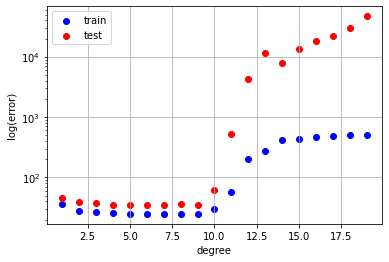

In [14]:
# 2. Graficar curvas de error acá.

# graficamos en escala semilog
ax = plt.gca()
ax.scatter(degrees, train_errors, color="blue", label="train")
ax.scatter(degrees, test_errors, color="red", label="test")
plt.grid()
plt.legend()
plt.xlabel("degree")
plt.ylabel("log(error)")
ax.set_yscale('log')

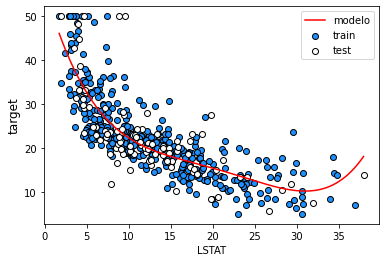

In [15]:
# 4. Reconstruir mejor modelo acá y graficar.

degree = 4
model_best = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_best.fit(X_train_f, y_train_reshape);
plt.plot(x, model_best.predict(x), color="red", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")

plt.xlabel(feature)
plt.ylabel('target',size=12)
plt.legend()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

Seleccionamos 2 atributos

In [16]:
# 1. Resolver acá. 

feature_x = 'LSTAT'
feature_y = 'AGE'

selector_x = (boston['feature_names'] == feature_x)
selector_y = (boston['feature_names'] == feature_y)

selector = selector_x | selector_y
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

Polinomio de grado 1
train_error: 36.18719138118293
test_error: 44.85122037825949 

Polinomio de grado 2
train_error: 25.219901153712822
test_error: 33.84356454611633 

Polinomio de grado 3
train_error: 23.101299392733345
test_error: 32.19472693815999 

Polinomio de grado 4
train_error: 21.152653904619214
test_error: 31.47777768820996 

Polinomio de grado 5
train_error: 20.784216683720103
test_error: 34.15765604711194 

Polinomio de grado 6
train_error: 20.2890394941429
test_error: 36.78598016053987 

Polinomio de grado 7
train_error: 20.382425535520333
test_error: 304.66319974583905 

Polinomio de grado 8
train_error: 4357.705647320264
test_error: 8099.396734623522 

Polinomio de grado 9
train_error: 11295.025359011264
test_error: 19416.543465598083 



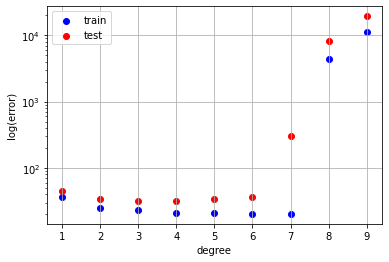

In [17]:
# 2. Resolver acá.

train_errors_fs = []
test_errors_fs = []
max_polynom_fs = 10

degrees_fs = list(range(1,max_polynom_fs)) # notemos que no estamos considerando el polinomio de grado 0

for degree in degrees_fs:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train_reshape)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_reshape, y_train_pred)
    test_error = mean_squared_error(y_test_reshape, y_test_pred)
    
    # imprimimos en pantalla
    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error)
    print('test_error:',test_error,'\n')
    
    # guardamos los errores en una lista
    train_errors_fs.append(train_error)
    test_errors_fs.append(test_error)
    
# grafiquemos los errores
ax = plt.gca()
ax.scatter(degrees_fs, train_errors_fs, color="blue", label="train")
ax.scatter(degrees_fs, test_errors_fs, color="red", label="test")
plt.grid()
plt.legend()
plt.xlabel("degree")
plt.ylabel("log(error)")
ax.set_yscale('log')

Ahora seleccionamos 3 atributos

In [18]:
# 1. Resolver acá. 

feature_x = 'LSTAT'
feature_y = 'AGE'
feature_z = 'DIS'

selector_x = (boston['feature_names'] == feature_x)
selector_y = (boston['feature_names'] == feature_y)
selector_z = (boston['feature_names'] == feature_z)

selector = selector_x | selector_y | selector_z
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 3), (102, 3))

Polinomio de grado 1
train_error: 35.3793830740877
test_error: 43.467426065411026 

Polinomio de grado 2
train_error: 23.470209890882884
test_error: 32.558346481230544 

Polinomio de grado 3
train_error: 20.724498880896018
test_error: 30.936218638131194 

Polinomio de grado 4
train_error: 18.70374382401471
test_error: 33.38354306390442 

Polinomio de grado 5
train_error: 17.719491704540054
test_error: 39.23289450130509 

Polinomio de grado 6
train_error: 21.433947297156298
test_error: 2498.1582589293575 

Polinomio de grado 7
train_error: 24.808726649696652
test_error: 1661.7703081983645 

Polinomio de grado 8
train_error: 409.18793636647854
test_error: 10329.42402815848 

Polinomio de grado 9
train_error: 1952.9191120659996
test_error: 2258974.1150187408 



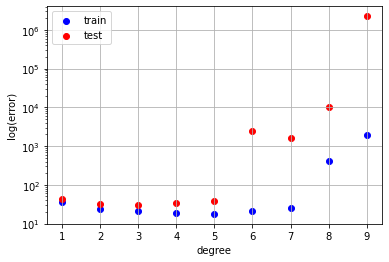

In [19]:
# 2. Resolver acá.

train_errors_fs = []
test_errors_fs = []
max_polynom_fs = 10

degrees_fs = list(range(1,max_polynom_fs)) # notemos que no estamos considerando el polinomio de grado 0

for degree in degrees_fs:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_fs, y_train_reshape)
    
    # predict:
    y_train_pred = model.predict(X_train_fs)
    y_test_pred = model.predict(X_test_fs)
    
    # evaluate:
    train_error = mean_squared_error(y_train_reshape, y_train_pred)
    test_error = mean_squared_error(y_test_reshape, y_test_pred)
    
    # imprimimos en pantalla
    print(f'Polinomio de grado {degree}')
    print('train_error:',train_error)
    print('test_error:',test_error,'\n')
    
    # guardamos los errores en una lista
    train_errors_fs.append(train_error)
    test_errors_fs.append(test_error)
    
# grafiquemos los errores
ax = plt.gca()
ax.scatter(degrees_fs, train_errors_fs, color="blue", label="train")
ax.scatter(degrees_fs, test_errors_fs, color="red", label="test")
plt.grid()
plt.legend()
plt.xlabel("degree")
plt.ylabel("log(error)")
ax.set_yscale('log')

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
